In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('../data/data.csv')

In [3]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
subset = data.iloc[:, 5:]

# 计算每行的最大值并形成新的一列
data['磁通密度峰值'] = subset.max(axis=1)

data['峰峰值'] = subset.max(axis=1) - subset.min(axis=1)

In [4]:
X=pd.concat([pd.get_dummies(data[['磁芯材料', '温度，oC','励磁波形']]).reset_index(drop=True),data[['频率，Hz','磁通密度峰值', "峰峰值"]].reset_index(drop=True)],axis=1)

Y = data['磁芯损耗，w/m3'].copy()

In [5]:
print(X.shape)
print(X.columns)
X

(12400, 11)
Index(['温度，oC', '磁芯材料_材料1', '磁芯材料_材料2', '磁芯材料_材料3', '磁芯材料_材料4', '励磁波形_三角波',
       '励磁波形_梯形波', '励磁波形_正弦波', '频率，Hz', '磁通密度峰值', '峰峰值'],
      dtype='object')


,温度，oC,磁芯材料_材料1,磁芯材料_材料2,磁芯材料_材料3,磁芯材料_材料4,励磁波形_三角波,励磁波形_梯形波,励磁波形_正弦波,频率，Hz,磁通密度峰值,峰峰值
0,25,True,False,False,False,False,False,True,50030,0.028849,0.057689
1,25,True,False,False,False,False,False,True,50020,0.031419,0.062846
2,25,True,False,False,False,False,False,True,50020,0.035535,0.071047
3,25,True,False,False,False,False,False,True,50020,0.040015,0.080041
4,25,True,False,False,False,False,False,True,50030,0.045028,0.090113
...,...,...,...,...,...,...,...,...,...,...,...
12395,90,False,False,False,True,False,True,False,199190,0.034867,0.069047
12396,90,False,False,False,True,False,True,False,199190,0.038341,0.075923
12397,90,False,False,False,True,False,True,False,199190,0.048877,0.096811
12398,90,False,False,False,True,False,True,False,199190,0.054889,0.108769


In [6]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

# 定义模型
# model_1 = DecisionTreeRegressor(random_state=42)
model_1 = xgb.XGBRegressor(
    n_estimators=100, max_depth=10, learning_rate=0.1, random_state=42
)
model_2 = RandomForestRegressor(random_state=42)
model_3 = GradientBoostingRegressor(max_depth=10, random_state=42)
model_1.fit(X, Y)
model_2.fit(X, Y)
model_3.fit(X, Y)

GradientBoostingRegressor(max_depth=10, random_state=42)

# 第四题测试

In [7]:
data2=pd.read_excel('../data/附件三（测试集）.xlsx')
data2

subset = data2.iloc[:, 5:]

# 计算每行的最大值并形成新的一列
data2['磁通密度峰值'] = subset.max(axis=1)

# 计算峰峰值
data2['峰峰值'] = subset.max(axis=1) - subset.min(axis=1)

X_predict = pd.concat(
    [
        pd.get_dummies(data2[["磁芯材料", "温度，oC", "励磁波形"]]).reset_index(drop=True),
        data2[["频率，Hz", "磁通密度峰值", "峰峰值"]].reset_index(drop=True),
    ],
    axis=1,
)

print(X_predict.columns)

# 模型预测
Y_pred_1 = np.maximum(model_1.predict(X_predict), 0)
Y_pred_2 = np.maximum(model_2.predict(X_predict), 0)
Y_pred_3 = np.maximum(model_3.predict(X_predict), 0)

# 集成：加权平均(采用直接网格搜索的权重)
Y_pred_ensemble = (Y_pred_1 * 0.8 + Y_pred_2 * 0.1 + Y_pred_3 * 0.1)
# Y_pred_ensemble = Y_pred_1
# 将结果保留一位小数
Y_pred_ensemble = np.round(Y_pred_ensemble, decimals=1)
print(Y_pred_ensemble.shape)

data_to=pd.read_excel('../data/附件四（Excel表）_Q1.xlsx')

# data_to['附件三（400个样品）磁芯损耗预测结果']=model.predict(X_predict)
data_to['附件三（400个样品）磁芯损耗预测结果']=Y_pred_ensemble

idx = [15,75,97,125,167,229,270,337,347,378]

data_to.iloc[idx]

Index(['温度，oC', '磁芯材料_材料1', '磁芯材料_材料2', '磁芯材料_材料3', '磁芯材料_材料4', '励磁波形_三角波',
       '励磁波形_梯形波', '励磁波形_正弦波', '频率，Hz', '磁通密度峰值', '峰峰值'],
      dtype='object')
(400,)


,序号,附件二（80个样品）励磁波形分类结果,附件三（400个样品）磁芯损耗预测结果
15,16,正弦波,772.3
75,76,正弦波,1877132.5
97,98,正弦波,13179.9
125,126,正弦波,1961.3
167,168,正弦波,99211.2
229,230,正弦波,69491.5
270,271,正弦波,1892152.5
337,338,正弦波,11895.0
347,348,正弦波,907401.5
378,379,正弦波,1533.5


In [8]:
X.columns

Index(['温度，oC', '磁芯材料_材料1', '磁芯材料_材料2', '磁芯材料_材料3', '磁芯材料_材料4', '励磁波形_三角波',
       '励磁波形_梯形波', '励磁波形_正弦波', '频率，Hz', '磁通密度峰值', '峰峰值'],
      dtype='object')

In [9]:
# 模型预测
Y_pred_1 = model_1.predict(X)
Y_pred_2 = model_2.predict(X)
Y_pred_3 = model_3.predict(X)

# print(Y_pred_1[0], Y_pred_2[0], Y_pred_3[0])
# 集成：加权平均(采用直接网格搜索的权重)
Y_pred_ensemble = (Y_pred_1 * 0.8 + Y_pred_2 * 0.1 + Y_pred_3 * 0.1)
print(Y_pred_ensemble)

[  2040.33462171   2723.00844501   4281.16881156 ...  44953.99033087
  59722.8586563  106355.74858203]


In [10]:
df=pd.DataFrame()

In [11]:
# 计算传输磁能
df["传输磁能"] = X["频率，Hz"] * X["磁通密度峰值"]

# 找到最大传输磁能所在的行索引
max_row_index = df["传输磁能"].idxmax()

# 查看该行的其它数据
max_row_data = X.loc[max_row_index]
max_row_data


温度，oC             70
磁芯材料_材料1        True
磁芯材料_材料2       False
磁芯材料_材料3       False
磁芯材料_材料4       False
励磁波形_三角波        True
励磁波形_梯形波       False
励磁波形_正弦波       False
频率，Hz         354610
磁通密度峰值      0.218857
峰峰值         0.436308
Name: 2867, dtype: object

In [12]:
X.columns

Index(['温度，oC', '磁芯材料_材料1', '磁芯材料_材料2', '磁芯材料_材料3', '磁芯材料_材料4', '励磁波形_三角波',
       '励磁波形_梯形波', '励磁波形_正弦波', '频率，Hz', '磁通密度峰值', '峰峰值'],
      dtype='object')

In [13]:
# '温度，oC'：[25, 50, 70, 90]
#  '磁芯材料_材料1', '磁芯材料_材料2', '磁芯材料_材料3', '磁芯材料_材料4', '励磁波形_三角波',
#        '励磁波形_梯形波', '励磁波形_正弦波':[1,0]
# '频率，Hz':[49990，501180]

# '磁通密度峰值':[0.00963815，0.313284469]

In [14]:
X['磁通密度峰值'].max()

0.313284469

In [15]:
X['磁通密度峰值'].min()

0.00963815

In [16]:
X['峰峰值'].max()

0.625702812

In [17]:
X['峰峰值'].min()

0.019089317

In [18]:
print(X['频率，Hz'].max())
print(X['频率，Hz'].min())

501180
49990


<Figure size 1000x600 with 0 Axes>

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.


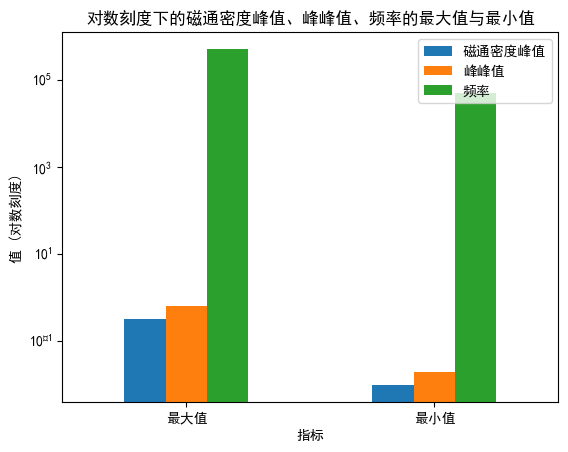

In [25]:
# 提取相关数据
data_to_plot = {
    '磁通密度峰值': [X['磁通密度峰值'].max(), X['磁通密度峰值'].min()],
    '峰峰值': [X['峰峰值'].max(), X['峰峰值'].min()],
    '频率': [X['频率，Hz'].max(), X['频率，Hz'].min()]
}
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 中文支持
plt.rcParams["axes.unicode_minus"] = False
# 创建 DataFrame
plot_df = pd.DataFrame(data_to_plot, index=['最大值', '最小值'])

# 绘制对数刻度的柱状图
plt.figure(figsize=(10, 6))
plot_df.plot(kind='bar', logy=True)
plt.title("对数刻度下的磁通密度峰值、峰峰值、频率的最大值与最小值")
plt.xlabel("指标")
plt.ylabel("值 (对数刻度)")
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()




In [19]:
#分析在什么条件下（温度、频率、波形、磁通密度峰值及磁芯材料），能达到最小的磁芯损耗以及具有最大的传输磁能

In [20]:
import pandas as pd
import numpy as np
import random
from deap import base, creator, tools, algorithms
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

style.use("ggplot")
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.sans-serif"] = ["SimHei"]  # 中文支持
plt.rcParams["axes.unicode_minus"] = False


# 定义
temperatures = [25, 50, 70, 90]
materials = ["材料1", "材料2", "材料3", "材料4"]
waveforms = ["三角波", "梯形波", "正弦波"]
freq_min, freq_max = 49990, 501180
flux_density_min, flux_density_max = 0.00963815, 0.313284469
peak2peak_min, peak2peak_max = 0.019089317, 0.625702812

# 设置遗传算法（GA）
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))  # 最小化核损耗
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()

# 属性生成器
toolbox.register("attr_temperature", random.randint, 0, len(temperatures) - 1)
toolbox.register("attr_material", random.randint, 0, len(materials) - 1)
toolbox.register("attr_waveform", random.randint, 0, len(waveforms) - 1)
toolbox.register("attr_frequency", random.uniform, freq_min, freq_max)
toolbox.register(
    "attr_flux_density", random.uniform, flux_density_min, flux_density_max
)
toolbox.register("attr_peak2peak", random.uniform, peak2peak_min, peak2peak_max)


# 结构初始化器
toolbox.register(
    "individual",
    tools.initCycle,
    creator.Individual,
    (
        toolbox.attr_temperature,
        toolbox.attr_material,
        toolbox.attr_waveform,
        toolbox.attr_frequency,
        toolbox.attr_flux_density,
        toolbox.attr_peak2peak,
    ),
    n=1,
)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)


# 评估函数
def evaluate(individual):
    temp_idx, mat_idx, wave_idx, freq, flux_density, peak2peak = individual
    # temp_idx, mat_idx, wave_idx, freq, flux_density = individual
    

    # 确保索引是整数
    temp_idx = int(round(temp_idx))
    mat_idx = int(round(mat_idx))
    wave_idx = int(round(wave_idx))

    data = {
        "温度，oC": [temperatures[temp_idx]],
        "磁芯材料_材料1": [1 if mat_idx == 0 else 0],
        "磁芯材料_材料2": [1 if mat_idx == 1 else 0],
        "磁芯材料_材料3": [1 if mat_idx == 2 else 0],
        "磁芯材料_材料4": [1 if mat_idx == 3 else 0],
        "励磁波形_三角波": [1 if wave_idx == 0 else 0],
        "励磁波形_梯形波": [1 if wave_idx == 1 else 0],
        "励磁波形_正弦波": [1 if wave_idx == 2 else 0],
        "频率，Hz": [freq],
        "磁通密度峰值": [flux_density],
        "峰峰值": [peak2peak],
    }
    X = pd.DataFrame(data)
    # print(X.columns, X.shape)
    # 预测磁芯损耗
    # print(model_1.predict(X)[0], model_2.predict(X)[0], model_3.predict(X)[0])
    # 对三个模型的输出进行约束，确保损耗为非负
    core_loss_1 = max(0, model_1.predict(X)[0])  # 限制模型输出为非负
    core_loss_2 = max(0, model_2.predict(X)[0])
    core_loss_3 = max(0, model_3.predict(X)[0])

    # 组合不同模型的预测结果
    core_loss = core_loss_1 * 0.8 + core_loss_2 * 0.1 + core_loss_3 * 0.1
    # core_loss = model_1.predict(X)[0] * 0.8 + model_2.predict(X)[0] * 0.1 + model_3.predict(X)[0] * 0.1
    # core_loss = model_1.predict(X)
    # return

    # 传递的磁能与峰值磁通密度成正比
    transmitted_energy = flux_density

    # 目标：最小化核损耗，最大化传递的磁能
    # 为简化，定义一个目标函数，将二者结合
    # 使用核损耗与传递能量的比值，添加一个很小的 epsilon 以避免除以零
    epsilon = 1e-6
    objective = core_loss / (transmitted_energy + epsilon)
    # print(core_loss[0], transmitted_energy)
    return (objective,)


toolbox.register("evaluate", evaluate)


# 自定义交叉操作
def custom_crossover(ind1, ind2):
    # 对整数变量（索引 0-2）进行交换
    for i in [0, 1, 2]:
        if random.random() < 0.5:
            ind1[i], ind2[i] = ind2[i], ind1[i]
    # 对连续变量（索引 3,4）使用混合交叉
    alpha = 0.5
    for i in [3, 4]:
        gamma = (1.0 + 2.0 * alpha) * random.random() - alpha
        val1 = ind1[i]
        val2 = ind2[i]
        ind1[i] = (1.0 - gamma) * val1 + gamma * val2
        ind2[i] = gamma * val1 + (1.0 - gamma) * val2
        # 确保变量在范围内
        if i == 3:
            ind1[i] = min(max(ind1[i], freq_min), freq_max)
            ind2[i] = min(max(ind2[i], freq_min), freq_max)
        elif i == 4:
            ind1[i] = min(max(ind1[i], flux_density_min), flux_density_max)
            ind2[i] = min(max(ind2[i], flux_density_min), flux_density_max)
        elif i == 5:
            ind1[i] = min(max(ind1[i], peak2peak_min), peak2peak_max)
            ind2[i] = min(max(ind2[i], peak2peak_min), peak2peak_max)
    return ind1, ind2


toolbox.register("mate", custom_crossover)


# 自定义突变操作
def custom_mutate(individual, indpb):
    # 突变温度索引
    if random.random() < indpb:
        individual[0] = random.randint(0, len(temperatures) - 1)
        # individual[0] = 0
    # 突变材料索引
    if random.random() < indpb:
        individual[1] = random.randint(0, len(materials) - 1)
        # individual[1] = 0
    # 突变波形索引
    if random.random() < indpb:
        individual[2] = random.randint(0, len(waveforms) - 1)
        # individual[2] = 2
    # 突变频率
    if random.random() < indpb:
        individual[3] += random.gauss(0, (freq_max - freq_min) * 0.1)
        # 确保在范围内
        individual[3] = min(max(individual[3], freq_min), freq_max)
        # individual[3] = 56320
    # 突变峰值磁通密度
    if random.random() < indpb:
        individual[4] += random.gauss(0, (flux_density_max - flux_density_min) * 0.1)
        # 确保在范围内
        individual[4] = min(max(individual[4], flux_density_min), flux_density_max)
        # individual[4] = 0.06242967
    # 突变峰峰值
    if random.random() < indpb:
        individual[5] += random.gauss(0, (peak2peak_max - peak2peak_min) * 0.1)
        # 确保在范围内
        individual[5] = min(max(individual[5], peak2peak_min), peak2peak_max) 
        # individual[5] = 0.12
    return (individual,)


toolbox.register("mutate", custom_mutate, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

# 运行遗传算法（GA）
population = toolbox.population(n=100)
NGEN = 50
best_individuals = []
fitness_values = []

for gen in range(NGEN):
    # 克隆种群
    offspring = list(map(toolbox.clone, population))
    # 应用交叉和突变
    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        if random.random() < 0.5:
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values
    for mutant in offspring:
        if random.random() < 0.2:
            toolbox.mutate(mutant)
            del mutant.fitness.values

    # 评估适应度无效的个体
    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    # 选择下一代种群
    population = toolbox.select(offspring, k=len(population))

    # 记录最佳个体
    top_ind = tools.selBest(population, k=1)[0]
    best_individuals.append(top_ind)
    fitness_values.append(top_ind.fitness.values[0])
    print(f"第 {gen} 代：最佳适应度 = {top_ind.fitness.values[0]:.6f}")

# 提取用于绘图的数据
generations = range(NGEN)
best_fitness = fitness_values

# 绘制迭代图
plt.figure(figsize=(12, 6))
plt.plot(generations, best_fitness, marker="o", linestyle="-", color="b")
plt.title("核心损耗与传递磁能的优化")
plt.xlabel("代数")
plt.ylabel("目标函数值")
plt.grid(True)
plt.show()

# 提取最佳个体
best_ind = tools.selBest(population, k=1)[0]
temp_idx, mat_idx, wave_idx, freq, flux_density, peak2peak = best_ind
# temp_idx, mat_idx, wave_idx, freq, flux_density = best_ind

# 确保索引是整数
temp_idx = int(round(temp_idx))
mat_idx = int(round(mat_idx))
wave_idx = int(round(wave_idx))

optimal_conditions = {
    "温度，oC": temperatures[temp_idx],
    "磁芯材料": materials[mat_idx],
    "励磁波形": waveforms[wave_idx],
    "频率，Hz": freq,
    "磁通密度峰值": flux_density,
    "峰峰值": peak2peak,
}

print("\n最佳条件：")
for key, value in optimal_conditions.items():
    print(f"{key}: {value}")

# 可视化最终种群的参数分布
df = pd.DataFrame(
    [
        {
            "温度，oC": temperatures[int(round(ind[0]))],
            "磁芯材料": materials[int(round(ind[1]))],
            "励磁波形": waveforms[int(round(ind[2]))],
            "频率，Hz": ind[3],
            "磁通密度峰值": ind[4],
            "峰峰值": ind[5],
            "目标值": ind.fitness.values[0],
        }
        for ind in population
    ]
)

ModuleNotFoundError: No module named 'deap'

In [22]:
best_fitness_value = min(fitness_values)
print(f"最佳组合的目标值为：{best_fitness_value:.6f}")


最佳组合的目标值为：2860.986811


In [26]:
# 提取最佳个体
best_ind = tools.selBest(population, k=1)[0]
temp_idx, mat_idx, wave_idx, freq, flux_density, peak2peak = best_ind
# temp_idx, mat_idx, wave_idx, freq, flux_density = best_ind
# 确保索引是整数
temp_idx = int(round(temp_idx))
mat_idx = int(round(mat_idx))
wave_idx = int(round(wave_idx))

# 创建最佳个体对应的数据
data = {
    '温度，oC': [temperatures[temp_idx]],
    '磁芯材料_材料1': [1 if mat_idx == 0 else 0],
    '磁芯材料_材料2': [1 if mat_idx == 1 else 0],
    '磁芯材料_材料3': [1 if mat_idx == 2 else 0],
    '磁芯材料_材料4': [1 if mat_idx == 3 else 0],
    '励磁波形_三角波': [1 if wave_idx == 0 else 0],
    '励磁波形_梯形波': [1 if wave_idx == 1 else 0],
    '励磁波形_正弦波': [1 if wave_idx == 2 else 0],
    '频率，Hz': [freq],
    '磁通密度峰值': [flux_density],
    '峰峰值': [peak2peak],
}
X = pd.DataFrame(data)

# 计算磁芯损耗
core_loss_1 = max(0, model_1.predict(X)[0])  # 限制模型输出为非负
core_loss_2 = max(0, model_2.predict(X)[0])
core_loss_3 = max(0, model_3.predict(X)[0])
core_loss = core_loss_1 * 0.8 + core_loss_2 * 0.1 + core_loss_3 * 0.1
# core_loss = model_1.predict(X)[0]

# 传输磁能等于峰值磁通密度
transmitted_energy = flux_density * freq

print(f"最佳组合时的磁芯损耗为：{core_loss:.6f}")
print(f"最佳组合时的传输磁能为：{transmitted_energy:.6f}")


最佳组合时的磁芯损耗为：54.523637
最佳组合时的传输磁能为：952.641092


# 粒子群优化算法

迭代 1: 最佳适应度 = 23090.676831
迭代 2: 最佳适应度 = 23090.676831
迭代 3: 最佳适应度 = 11520.756882
迭代 4: 最佳适应度 = 8071.073171
迭代 5: 最佳适应度 = 6553.488910
迭代 6: 最佳适应度 = 6536.177110
迭代 7: 最佳适应度 = 5195.000268
迭代 8: 最佳适应度 = 5195.000268
迭代 9: 最佳适应度 = 5195.000268
迭代 10: 最佳适应度 = 5195.000268
迭代 11: 最佳适应度 = 5195.000268
迭代 12: 最佳适应度 = 5195.000268
迭代 13: 最佳适应度 = 5195.000268
迭代 14: 最佳适应度 = 5195.000268
迭代 15: 最佳适应度 = 5195.000268
迭代 16: 最佳适应度 = 5195.000268
迭代 17: 最佳适应度 = 5187.369722
迭代 18: 最佳适应度 = 5187.369722
迭代 19: 最佳适应度 = 5187.369722
迭代 20: 最佳适应度 = 5187.369722
迭代 21: 最佳适应度 = 5187.369722
迭代 22: 最佳适应度 = 5187.369722
迭代 23: 最佳适应度 = 5187.369722
迭代 24: 最佳适应度 = 5187.369722
迭代 25: 最佳适应度 = 5187.369722
迭代 26: 最佳适应度 = 5187.369722
迭代 27: 最佳适应度 = 5187.369722
迭代 28: 最佳适应度 = 5187.369722
迭代 29: 最佳适应度 = 5187.369722
迭代 30: 最佳适应度 = 5187.369722
迭代 31: 最佳适应度 = 5187.369722
迭代 32: 最佳适应度 = 5187.369722
迭代 33: 最佳适应度 = 5187.369722
迭代 34: 最佳适应度 = 5187.369722
迭代 35: 最佳适应度 = 5187.369722
迭代 36: 最佳适应度 = 5187.369722
迭代 37: 最佳适应度 = 5187.369722
迭代 38: 

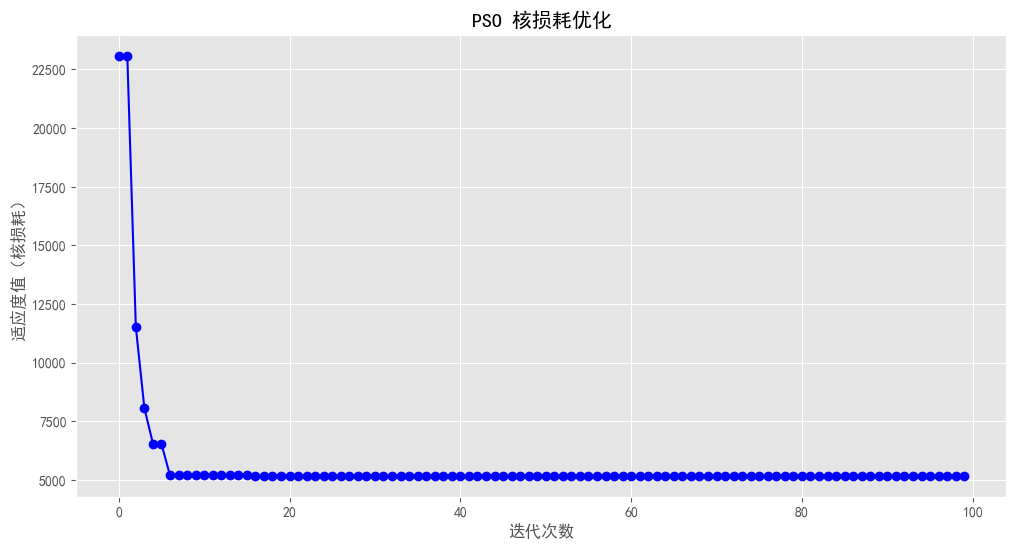

In [26]:
import pandas as pd
import numpy as np
import random
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

style.use("ggplot")
plt.rcParams["font.sans-serif"] = ["SimHei"]  # 中文支持
plt.rcParams["axes.unicode_minus"] = False

# 定义
temperatures = [25, 50, 70, 90]
materials = ["材料1", "材料2", "材料3", "材料4"]
waveforms = ["三角波", "梯形波", "正弦波"]
freq_min, freq_max = 49990, 501180
flux_density_min, flux_density_max = 0.00963815, 0.313284469
peak2peak_min, peak2peak_max = 0.019089317, 0.625702812

# PSO 参数
c1, c2 = 1.5, 1.5  # 社会和认知加速常数
w = 0.5  # 惯性权重
n_particles = 30  # 粒子数量
n_iterations = 100  # 迭代次数

# 初始化粒子位置和速度
def initialize_particles(n_particles):
    particles = []
    velocities = []
    for _ in range(n_particles):
        particle = [
            random.randint(0, len(temperatures) - 1),  # 温度
            random.randint(0, len(materials) - 1),     # 材料
            random.randint(0, len(waveforms) - 1),     # 波形
            random.uniform(freq_min, freq_max),        # 频率
            random.uniform(flux_density_min, flux_density_max),  # 磁通密度峰值
            random.uniform(peak2peak_min, peak2peak_max),         # 峰峰值
        ]
        velocity = [random.uniform(-1, 1) for _ in range(len(particle))]
        particles.append(particle)
        velocities.append(velocity)
    return particles, velocities

# 评估函数
def evaluate(particle):
    temp_idx, mat_idx, wave_idx, freq, flux_density, peak2peak = particle

    # 确保索引是整数
    temp_idx = int(round(temp_idx))
    mat_idx = int(round(mat_idx))
    wave_idx = int(round(wave_idx))

    data = {
        "温度，oC": [temperatures[temp_idx]],
        "磁芯材料_材料1": [1 if mat_idx == 0 else 0],
        "磁芯材料_材料2": [1 if mat_idx == 1 else 0],
        "磁芯材料_材料3": [1 if mat_idx == 2 else 0],
        "磁芯材料_材料4": [1 if mat_idx == 3 else 0],
        "励磁波形_三角波": [1 if wave_idx == 0 else 0],
        "励磁波形_梯形波": [1 if wave_idx == 1 else 0],
        "励磁波形_正弦波": [1 if wave_idx == 2 else 0],
        "频率，Hz": [freq],
        "磁通密度峰值": [flux_density],
        "峰峰值": [peak2peak]
    }
    X = pd.DataFrame(data)

    # 模型预测
    core_loss_1 = max(0, model_1.predict(X)[0])
    core_loss_2 = max(0, model_2.predict(X)[0])
    core_loss_3 = max(0, model_3.predict(X)[0])

    # 核损耗加权平均
    core_loss = core_loss_1 * 0.8 + core_loss_2 * 0.1 + core_loss_3 * 0.1

    transmitted_energy = flux_density
    epsilon = 1e-6
    objective = core_loss / (transmitted_energy + epsilon)
    return objective

# 更新粒子速度和位置
def update_particle(particle, velocity, pbest, gbest, w, c1, c2):
    new_velocity = [
        w * velocity[i]
        + c1 * random.random() * (pbest[i] - particle[i])
        + c2 * random.random() * (gbest[i] - particle[i])
        for i in range(len(particle))
    ]
    new_particle = [particle[i] + new_velocity[i] for i in range(len(particle))]

    # 确保粒子参数在合理范围内
    new_particle[0] = int(min(max(new_particle[0], 0), len(temperatures) - 1))
    new_particle[1] = int(min(max(new_particle[1], 0), len(materials) - 1))
    new_particle[2] = int(min(max(new_particle[2], 0), len(waveforms) - 1))
    new_particle[3] = min(max(new_particle[3], freq_min), freq_max)
    new_particle[4] = min(max(new_particle[4], flux_density_min), flux_density_max)
    new_particle[5] = min(max(new_particle[5], peak2peak_min), peak2peak_max)

    return new_particle, new_velocity

# 粒子群优化主程序
def pso(n_particles, n_iterations, w, c1, c2):
    particles, velocities = initialize_particles(n_particles)

    pbest = particles[:]
    pbest_values = [evaluate(p) for p in particles]
    gbest = pbest[np.argmin(pbest_values)]
    gbest_value = min(pbest_values)

    history = []

    for iteration in range(n_iterations):
        for i in range(n_particles):
            particles[i], velocities[i] = update_particle(
                particles[i], velocities[i], pbest[i], gbest, w, c1, c2
            )

            # 评估新位置的适应度
            fitness_value = evaluate(particles[i])
            if fitness_value < pbest_values[i]:
                pbest[i] = particles[i]
                pbest_values[i] = fitness_value

        # 更新全局最佳
        if min(pbest_values) < gbest_value:
            gbest = pbest[np.argmin(pbest_values)]
            gbest_value = min(pbest_values)

        history.append(gbest_value)
        print(f"迭代 {iteration + 1}: 最佳适应度 = {gbest_value:.6f}")

    return gbest, gbest_value, history

# 运行粒子群优化
best_particle, best_value, history = pso(n_particles, n_iterations, w, c1, c2)

# 打印最佳结果
optimal_conditions = {
    "温度，oC": temperatures[int(round(best_particle[0]))],
    "磁芯材料": materials[int(round(best_particle[1]))],
    "励磁波形": waveforms[int(round(best_particle[2]))],
    "频率，Hz": best_particle[3],
    "磁通密度峰值": best_particle[4],
    "峰峰值": best_particle[5]
}
print("\n最佳条件：")
for key, value in optimal_conditions.items():
    print(f"{key}: {value}")

# 可视化迭代历史
plt.figure(figsize=(12, 6))
plt.plot(range(n_iterations), history, marker="o", linestyle="-", color="b")
plt.title("PSO 核损耗优化")
plt.xlabel("迭代次数")
plt.ylabel("适应度值（核损耗）")
plt.grid(True)
plt.show()


In [27]:
# 假设这是粒子群算法的最佳位置 (gbest_position)
best_position = best_particle  # gbest_position 是 PSO 优化后的全局最佳位置

# 分别提取最佳个体的各个值（温度、材料、励磁波形、频率、磁通密度）
temp_idx, mat_idx, wave_idx, freq, flux_density, peak2peak = best_position

# 将温度、材料和波形的索引转换为整数
temp_idx = int(round(temp_idx))
mat_idx = int(round(mat_idx))
wave_idx = int(round(wave_idx))

# 创建与最佳个体对应的输入数据
data = {
    '温度，oC': [temperatures[temp_idx]],  # 选择对应的温度
    '磁芯材料_材料1': [1 if mat_idx == 0 else 0],  # 选择磁芯材料
    '磁芯材料_材料2': [1 if mat_idx == 1 else 0],
    '磁芯材料_材料3': [1 if mat_idx == 2 else 0],
    '磁芯材料_材料4': [1 if mat_idx == 3 else 0],
    '励磁波形_三角波': [1 if wave_idx == 0 else 0],  # 选择励磁波形
    '励磁波形_梯形波': [1 if wave_idx == 1 else 0],
    '励磁波形_正弦波': [1 if wave_idx == 2 else 0],
    '频率，Hz': [freq],  # 频率值
    '磁通密度峰值': [flux_density],  # 磁通密度峰值
    '峰峰值': [peak2peak]
}

# 将数据转换为DataFrame，供模型预测使用
X = pd.DataFrame(data)

# 计算磁芯损耗，确保模型输出非负
core_loss_1 = max(0, model_1.predict(X)[0])
core_loss_2 = max(0, model_2.predict(X)[0])
core_loss_3 = max(0, model_3.predict(X)[0])

# 综合多个模型的预测结果（加权平均）
core_loss = core_loss_1 * 0.8 + core_loss_2 * 0.1 + core_loss_3 * 0.1

# 传输磁能等于峰值磁通密度与频率的乘积
transmitted_energy = flux_density * freq

# 输出最佳个体的结果
print(f"最佳组合时的磁芯损耗为：{core_loss:.6f}")
print(f"最佳组合时的传输磁能为：{transmitted_energy:.6f}")

# 输出最佳个体的选择条件
optimal_conditions = {
    "温度，oC": temperatures[temp_idx],
    "磁芯材料": materials[mat_idx],
    "励磁波形": waveforms[wave_idx],
    "频率，Hz": freq,
    "磁通密度峰值": flux_density,
    "峰峰值": peak2peak
}

print("\n最佳条件：")
for key, value in optimal_conditions.items():
    print(f"{key}: {value}")


最佳组合时的磁芯损耗为：50.001835
最佳组合时的传输磁能为：690.208404

最佳条件：
温度，oC: 90
磁芯材料: 材料1
励磁波形: 正弦波
频率，Hz: 71612.12517085836
磁通密度峰值: 0.00963815
峰峰值: 0.019089317


In [36]:
# 【腾讯文档】2024华为杯研赛成品助攻预定文档
# https://docs.qq.com/doc/DYW9LaWdDU2NDcmVD